### Importing drive and libraries

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [ ]:
train_path="/content/drive/MyDrive/projects/Covid detection/Train"
validation_path="/content/drive/MyDrive/projects/Covid detection/Validation"

### Preprocessing data

#### Preprocessing the training set

In [ ]:
train_datagen= image.ImageDataGenerator(
    rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2,
)

train_set=train_datagen.flow_from_directory(train_path,target_size=(256,256)
,batch_size=16,class_mode="binary")

Found 248 images belonging to 2 classes.


In [ ]:
train_set.class_indices

{'covid': 0, 'normal': 1}

#### Preprocessing the validation set

In [ ]:
validation_datagen=image.ImageDataGenerator(
    rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2

)

validation_set=validation_datagen.flow_from_directory(validation_path,target_size=(256,256)
,batch_size=16,class_mode="binary")

Found 81 images belonging to 2 classes.


#### Visualization of covid and normal images

printing these three images
IM-0626-0001-0001.jpeg
IM-0631-0001-0002.jpeg
NORMAL2-IM-1040-0001.jpeg


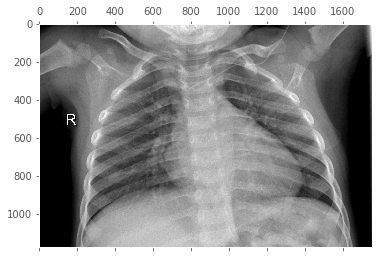

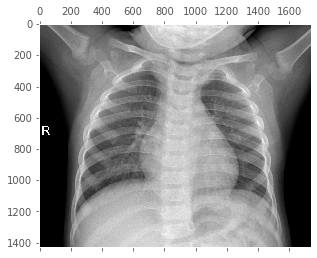

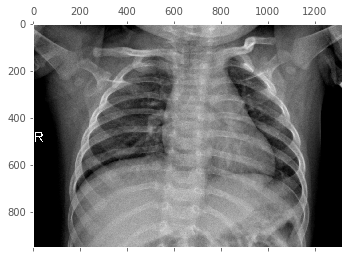

In [ ]:
import os,random
folder_n="/content/drive/MyDrive/projects/Covid detection/Train/normal"
a=random.choice(os.listdir(folder_n))
b=random.choice(os.listdir(folder_n))
c=random.choice(os.listdir(folder_n))
print("printing these three images")
print(a)
print(b)
print(c)

random_n=[a,b,c]
for i in range(len(random_n)):
  file=folder_n + "/" + random_n[i]
  img=image.load_img(file)
  plt.matshow(img)
  plt.grid(False)
  plt.show()

printing these three images
41182_2020_203_Fig3_HTML.jpg
covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-2.jpg
a361d7b7.jpg


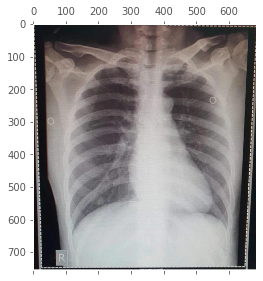

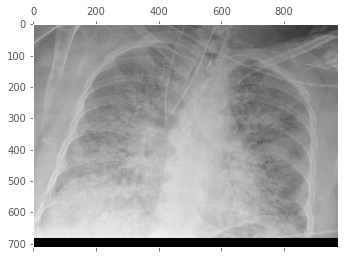

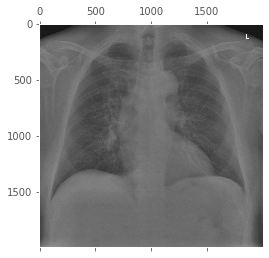

In [ ]:
folder_n="/content/drive/MyDrive/projects/Covid detection/Train/covid"
a=random.choice(os.listdir(folder_n))
b=random.choice(os.listdir(folder_n))
c=random.choice(os.listdir(folder_n))
print("printing these three images")
print(a)
print(b)
print(c)

random_n=[a,b,c]

for i in range(len(random_n)):
  file=folder_n + "/" + random_n[i]
  img=image.load_img(file)
  plt.matshow(img)
  plt.grid(False)
  plt.show()

### Building the CNN

#### Intialising the layer

In [ ]:
model=Sequential()

#### Add convolution layer

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Dropout(rate=0.25))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Dropout(rate=0.25))

#### Flattening 

In [ ]:
model.add(tf.keras.layers.Flatten())

#### Full connection

In [ ]:
model.add(tf.keras.layers.Dense(units=64,activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))

#### Output layer

In [ ]:
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

### Training the CNN

##### Compiling the CNN

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0

##### Training the CNN on training set

In [ ]:
history=model.fit(x=train_set,steps_per_epoch=8,epochs=25,
         validation_steps=2,validation_data=validation_set)

Epoch 1/25
8/8 [==============================] - 13s 1s/step - loss: 1.1293 - accuracy: 0.5167 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/25
8/8 [==============================] - 7s 943ms/step - loss: 0.6847 - accuracy: 0.5083 - val_loss: 0.6685 - val_accuracy: 0.4062
Epoch 3/25
8/8 [==============================] - 7s 1s/step - loss: 0.5734 - accuracy: 0.6667 - val_loss: 0.5023 - val_accuracy: 0.7812
Epoch 4/25
8/8 [==============================] - 8s 1s/step - loss: 0.4932 - accuracy: 0.7500 - val_loss: 0.3876 - val_accuracy: 0.9062
Epoch 5/25
8/8 [==============================] - 8s 973ms/step - loss: 0.3771 - accuracy: 0.8250 - val_loss: 0.4613 - val_accuracy: 0.8438
Epoch 6/25
8/8 [==============================] - 8s 1s/step - loss: 0.3345 - accuracy: 0.9062 - val_loss: 0.2312 - val_accuracy: 0.9375
Epoch 7/25
8/8 [==============================] - 8s 974ms/step - loss: 0.2900 - accuracy: 0.8750 - val_loss: 0.1902 - val_accuracy: 1.0000
Epoch 8/25
8/8 [===============

#### Visualization of loss and accuracy 

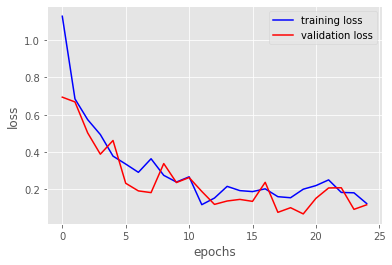

In [ ]:
plt.plot(history.history["loss"],"r",label="training loss",color="blue")
plt.plot(history.history["val_loss"],label="validation loss",color="red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

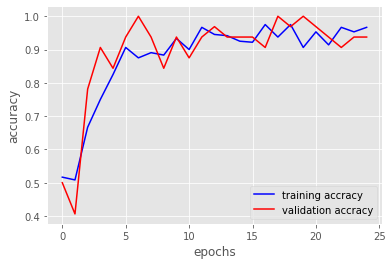

In [ ]:
plt.plot(history.history["accuracy"],"r",label="training accracy",color="blue")
plt.plot(history.history["val_accuracy"],label="validation accracy",color="red")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

##### Making a single prediction

In [ ]:
image_path="/content/drive/MyDrive/projects/Covid detection/Test_data/covid/f8335316.jpg"
img=image.load_img(image_path,target_size=(256,256))
img=image.img_to_array(img)/255
img=np.array([img])
print(img.shape)
model.predict(img)

(1, 256, 256, 3)


array([[0.00132855]], dtype=float32)

#### Evaluation on test data

In [ ]:
covid_lst=os.listdir("/content/drive/MyDrive/projects/Covid detection/Test_data/covid")
print(covid_lst)

['FE9F9A5D-2830-46F9-851B-1FF4534959BE.jpeg', 'nejmoa2001191_f5-PA.jpeg', 'gr1_lrg-a.jpg', 'figure1-5e75d0940b71e1b702629659-98-right.jpeg', 'paving.jpg', 'lancet-case2b.jpg', 'nCoV-radiol.2020200269.fig1-day7.jpeg', 'nejmc2001573_f1b.jpeg', 'nejmoa2001191_f3-PA.jpeg', 'nejmoa2001191_f1-PA.jpeg', 'figure1-5e71be566aa8714a04de3386-98-left.jpeg', 'nejmoa2001191_f4.jpeg', 'lancet-case2a.jpg', 'nejmc2001573_f1a.jpeg', 'fff49165-b22d-4bb4-b9d1-d5d62c52436c.annot.original.png', 'kjr-21-e25-g001-l-a.jpg', 'f8335316.jpg', 'gr1_lrg-b.jpg', 'ryct.2020200034.fig2.jpeg', 'radiol.2020200274.fig3d.png', 'ryct.2020003.fig2-b.png', 'radiol.2020200490.fig3.jpeg', 'ryct.2020003.fig2-c.png', 'yxppt-2020-02-19_00-51-27_287214-day8.jpg', 'thnov10p5641g006-c.png', 'ryct.2020200034.fig5-day0.jpeg', 'tpmd200203f2-c.png', 'tpmd200203f2-b.png', 'ryct.2020200034.fig5-day7.jpeg', 'ryct.2020200028.fig1a.jpeg', 'ryct.2020003.fig2-a.png']


In [ ]:
covid_pred=[]
for item in covid_lst:
  img_path="/content/drive/MyDrive/projects/Covid detection/Test_data/covid/" + item
  img=image.load_img(img_path,target_size=(256,256))
  img=image.img_to_array(img)/255
  img=np.array([img])
  covid_pred.append(model.predict(img))

In [ ]:
covid_class=pd.Series(covid_pred)

In [ ]:
covid_class=pd.Series([covid_class[i][0] for i in range(len(covid_class))])
covid_class=covid_class.str[0]
covid_class.head()

0    0.000249
1    0.014406
2    0.779460
3    0.001319
4    0.105661
dtype: float64

In [ ]:
normal_lst=os.listdir("/content/drive/MyDrive/projects/Covid detection/Test_data/normal")
print(normal_lst)

['NORMAL2-IM-1111-0001.jpeg', 'NORMAL2-IM-1131-0001.jpeg', 'NORMAL2-IM-1125-0001.jpeg', 'NORMAL2-IM-1108-0001.jpeg', 'NORMAL2-IM-1123-0001.jpeg', 'NORMAL2-IM-1120-0001.jpeg', 'NORMAL2-IM-1149-0001.jpeg', 'NORMAL2-IM-1214-0001.jpeg', 'NORMAL2-IM-1194-0001.jpeg', 'NORMAL2-IM-1183-0001.jpeg', 'NORMAL2-IM-1204-0001.jpeg', 'NORMAL2-IM-1201-0001.jpeg', 'NORMAL2-IM-1254-0001.jpeg', 'NORMAL2-IM-1256-0001.jpeg', 'NORMAL2-IM-1234-0001.jpeg', 'NORMAL2-IM-1232-0001.jpeg', 'NORMAL2-IM-1227-0001.jpeg', 'NORMAL2-IM-1243-0001.jpeg', 'NORMAL2-IM-1257-0001.jpeg', 'NORMAL2-IM-1237-0001.jpeg', 'NORMAL2-IM-1260-0001.jpeg', 'NORMAL2-IM-1253-0001.jpeg', 'NORMAL2-IM-1286-0001.jpeg', 'NORMAL2-IM-1291-0001.jpeg', 'NORMAL2-IM-1289-0001.jpeg', 'NORMAL2-IM-1266-0001-0002.jpeg', 'NORMAL2-IM-1295-0001.jpeg', 'NORMAL2-IM-1302-0001.jpeg', 'NORMAL2-IM-1308-0001.jpeg', 'NORMAL2-IM-1341-0001.jpeg', 'NORMAL2-IM-1345-0001.jpeg']


In [ ]:
normal_pred=[]
for item in normal_lst:
  img_path="/content/drive/MyDrive/projects/Covid detection/Test_data/normal/" + item
  img=image.load_img(img_path,target_size=(256,256))
  img=image.img_to_array(img)/255
  img=np.array([img])
  normal_pred.append(model.predict(img))

In [ ]:
normal_class=pd.Series(normal_pred)

In [ ]:
normal_class=pd.Series([normal_class[i][0] for i in range(len(normal_class))])
normal_class=normal_class.str[0]
normal_class.head()

0    0.995827
1    0.999719
2    0.996439
3    0.999326
4    0.999213
dtype: float64

In [ ]:
model_test_pred=pd.concat([covid_class,normal_class],axis=0)
model_test_pred=round(model_test_pred)
model_test_pred.unique()

array([0., 1.])

In [ ]:
actual_normal=pd.Series([1 for i in range(len(normal_class))])
actual_covid=pd.Series([0 for i in range(len(covid_class))])

In [ ]:
actual_test_data=pd.concat([actual_covid,actual_normal],axis=0)
actual_test_data.unique()

array([0, 1])

In [ ]:
prediction=pd.concat([model_test_pred,actual_test_data],axis=1)
prediction.columns=["Predicted","Actual"]
prediction=prediction.sample(frac=1,random_state=100)
prediction.head()

,Predicted,Actual
11,0.0,0
28,0.0,0
22,1.0,1
18,0.0,0
15,1.0,1


##### Accuracy score,Confusion matrix and Classification report 

In [ ]:
accuracy_score(actual_test_data,model_test_pred)

0.9354838709677419

In [ ]:
cf=confusion_matrix(actual_test_data,model_test_pred)

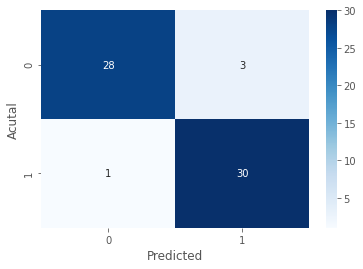

In [ ]:
sns.heatmap(cf,annot=True,cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Acutal")
plt.show()

In [ ]:
print(classification_report(actual_test_data,model_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.91      0.97      0.94        31

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62

